In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
#columns to use
title_cols = ['title', 'year', 'genre', 'country', 'director', 'actors', 'budget', 'usa_gross_income', 'worlwide_gross_income']

#create filepath
filepath = r'C:\Users\K\Downloads\IMDb movies.csv'

#read file into pandas dataframe: movies
movies = pd.read_csv(filepath, header=0, usecols= title_cols, low_memory=False)
movies.rename({'year':'release_year', 'worlwide_gross_income':'worldwide_gross_income'}, axis=1, inplace=True)

#convert 'release_year' to string and remove any extraneous text
movies['release_year'] = movies['release_year'].astype(str).replace(r'[^0-9]+', "")
#remove dollar signs from usa_gross_income, wolrdwide_gross_income, budget
movies['usa_gross_income'] = movies['usa_gross_income'].str.replace(r'[^0-9]+', '').fillna(0).astype(int)
movies['worldwide_gross_income'] = movies['worldwide_gross_income'].str.replace(r'[^0-9]+', '').fillna(0).astype('int64')
movies['budget'] = movies['budget'].str.replace(r'[^0-9]+', '').fillna(0).astype('int64')

#movies.head()

In [4]:
#movies.info()

str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 9 columns):
title                     85855 non-null object
release_year              85855 non-null object
genre                     85855 non-null object
country                   85791 non-null object
director                  85768 non-null object
actors                    85786 non-null object
budget                    85855 non-null int64
usa_gross_income          85855 non-null int32
worldwide_gross_income    85855 non-null int64
dtypes: int32(1), int64(2), object(6)
memory usage: 5.6+ MB


In [4]:
#slice for only movies from 2010 to 2019
movies_2010 = movies.query("release_year >= '2010' & release_year < '2020'")
movies_2010.head(10)

#get top grossing film each year and save: top_films
top_films_us = movies_2010.loc[movies_2010.groupby('release_year')['usa_gross_income'].nlargest(5).unstack().columns].sort_values(['release_year','usa_gross_income'],
                                                                                                                  ascending = [True,False])

top_films_global = movies_2010.loc[movies_2010.groupby('release_year')['worldwide_gross_income'].nlargest(20).unstack().columns]\
.sort_values(['release_year', 'worldwide_gross_income'], ascending = [True, False])

In [4]:
#top_films_global.head(10)

In [5]:
#setup empty list: lead_actor
lead_actor = []
#append lead actor from each film to list
for index in top_films_global.index:
    new = top_films_global.loc[index,'actors'].split(",",1)[0]
    lead_actor.append(new)

#print(lead_actor)
#len(lead_actor)

In [7]:
#add a column with the lead actor for each film: lead_actor
top_films_global['lead_actor'] = lead_actor

#top_films_global.head(10)

,title,release_year,genre,country,director,actors,budget,usa_gross_income,worldwide_gross_income,lead_actor
46673,Toy Story 3 - La grande fuga,2010,"Animation, Adventure, Comedy",USA,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",200000000,415004880,1066969703,Tom Hanks
52435,Alice in Wonderland,2010,"Adventure, Family, Fantasy","USA, UK",Tim Burton,"Johnny Depp, Mia Wasikowska, Helena Bonham Car...",200000000,334191110,1025467110,Johnny Depp
51529,Harry Potter e i Doni della Morte - Parte 1,2010,"Adventure, Family, Fantasy","UK, USA",David Yates,"Bill Nighy, Emma Watson, Richard Griffiths, Ha...",150000000,296347721,976952911,Bill Nighy
57475,Inception,2010,"Action, Adventure, Sci-Fi","USA, UK",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",160000000,292576195,869784991,Leonardo DiCaprio
51248,Shrek e vissero felici e contenti,2010,"Animation, Adventure, Comedy",USA,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",165000000,238736787,752600867,Mike Myers
56976,The Twilight Saga: Eclipse,2010,"Adventure, Drama, Fantasy",USA,David Slade,"Xavier Samuel, Kristen Stewart, Robert Pattins...",68000000,300531751,698491347,Xavier Samuel
55683,Iron Man 2,2010,"Action, Adventure, Sci-Fi",USA,Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadl...",200000000,312433331,623933331,Robert Downey Jr.
45080,Rapunzel: L'intreccio della torre,2010,"Animation, Adventure, Comedy",USA,"Nathan Greno, Byron Howard","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",260000000,200821936,592461732,Mandy Moore
56958,Cattivissimo me,2010,"Animation, Comedy, Family","USA, France","Pierre Coffin, Chris Renaud","Steve Carell, Jason Segel, Russell Brand, Juli...",69000000,251513985,543113985,Steve Carell
51246,Dragon Trainer,2010,"Animation, Action, Adventure",USA,"Dean DeBlois, Chris Sanders","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",165000000,217581231,494878759,Jay Baruchel


In [34]:
#create a list of all top film titles
#title_list = list(top_films_global.loc[index, 'title'] for index in top_films_global.index)

In [25]:
#title_list

In [8]:
translated_titles_list = ['Toy Story 3 - The Great Escape',
 'Alice in Wonderland',
 'Harry Potter and the Deathly Hallows - Part 1',
 'Inception',
 'Shrek and they lived happily ever after',
 'The Twilight Saga: Eclipse',
 'Iron Man 2',
 "Rapunzel: The Intertwining of the Tower",
 'Despicable Me',
 'How to Train Your Dragon',
 'Clash of the Titans',
 'The King\'s Speech',
 'The Chronicles of Narnia - The Voyage of the Sailing Ship',
 'Tron: Legacy',
 'The Karate Kid - The legend continues',
 'Prince of Persia - The Sands of Time',
 'The black Swan',
 'Megamind',
 'Robin Hood',
 "The last ruler of the air",
 'Harry Potter and the Deathly Hallows - Part 2',
 'Transformers 3',
 'Pirates of the Caribbean - On Stranger Tides',
 'The Twilight Saga: Breaking Dawn - Part 1',
 'Mission: Impossible - Ghost Protocol',
 'Kung Fu Panda 2',
 'Fast & Furious 5',
 'Hangover 2',
 'The Smurfs',
 'Cars 2',
 'The cat with the boots',
 'Sherlock Holmes - A Game of Shadows',
 'Rio',
 "Dawn of the Planet of the Apes",
 'Thor',
 'Almost Friends - Intouchables',
 "The Adventures of Tintin - The Secret of the Unicorn",
 'Captain America - The First Avenger',
 "X-Men - The Beginning",
 'Alvin and the Chipmunks 3 - Save whoever can!',
 'The Avengers',
 'Skyfall',
 'The Dark Knight - The Return',
 'The Hobbit - An Unexpected Journey',
 "Ice Age 4 - Continents adrift",
 'The Twilight Saga: Breaking Dawn - Part 2',
 'The Amazing Spider-Man',
 'Madagascar 3 - Most Wanted in Europe',
 'Hunger Games',
 'Men in Black 3',
 'Life of Pi',
 'Ted',
 'Rebel: The Brave',
 'Wreck-It Ralph',
 'Les Misérables',
 'Django Unchained',
 'Prometheus',
 'Snow White and the Hunter',
 'Business Man',
 'Taken - Revenge',
 'Frozen the ice kingdom',
 'Iron Man 3',
 'Despicable Me 2',
 'The Hobbit: The Desolation of Smaug',
 'Hunger Games: Girl on Fire',
 'Fast & Furious 6',
 'Monsters University',
 'Gravity',
 "The man of Steel",
 'Thor: The Dark World',
 'The Croods',
 'World War Z',
 'Pandiya Naadu',
 'The great and mighty Oz',
 'Into Darkness - Star Trek',
 "Wolverine - The Immortal",
 'Pacific Rim',
 'The Wolf of Wall Street',
 'G.I. Joe - Revenge ',
 'Hangover 3',
 "Transformers 4 - Age of Extinction",
 'The Hobbit - The Battle of the Five Armies',
 'Guardians of the Galaxy',
 'Maleficent',
 'The Hunger Games: Song of Uprising - Part I',
 'X-Men - Days of Future Past',
 'Naan Sigappu Manithan',
 'Captain America: The Winter Soldier',
 'Apes Revolution - Planet of the Apes',
 'The Amazing Spider-Man 2 - The Power of Electro',
 'Interstellar',
 'Big Hero 6',
 'How to Train Your Dragon 2',
 'American Sniper',
 'Godzilla',
 'Rio 2 - Amazon Mission',
 'Ninja Turtles',
 'The Lego Movie',
 'Lucy',
 'Govindudu Andari Vaadele',
 'Star Wars - The Force Awakens',
 'Jurassic World',
 'Fast & Furious 7',
 'Avengers: Age of Ultron',
 'Minions',
 'Specter',
 'Inside Out',
 'Temper',
 'Mission: Impossible - Rogue Nation',
 'Gopala Gopala',
 'The Hunger Games: Song of Uprising - Part 2',
 'Survivor - The Martian',
 'Premam',
 'Fifty Shades of Gray',
 'Naanum Rowdydhaan',
 'Cinderella',
 'Revenant - Revenant',
 'Ant-Man',
 'Bhale Bhale Magadivoy',
 'Hotel Transylvania 2',
 'Captain America: Civil War',
 'Rogue One: A Star Wars Story',
 'Finding Dory',
 'Zootropolis',
 'The Jungle Book',
 'The Secret Life of Pets',
 'Batman v Superman: Dawn of Justice',
 'Fantastic Beasts and Where to Find Them',
 'Deadpool',
 'Suicide Squad',
 'Doctor Strange',
 'Oceania',
 'Sing',
 'Mei ren yu',
 'X-Men: Apocalypse',
 'Kung Fu Panda 3',
 'La La Land',
 "Warcraft: The Beginning",
 'Jason Bourne',
 "Ice Age - On a Collision Course",
 'Star Wars - The Last Jedi',
 'The beauty and the Beast',
 'Fast & Furious 8',
 'Despicable Me 3',
 'Jumanji - Welcome to the jungle',
 'Spider-Man: Homecoming',
 'Wolf Warrior 2',
 'Guardians of the Galaxy Vol. 2',
 'Thor: Ragnarok',
 'Wonder Woman',
 'Coco',
 'Pirates of the Caribbean - Salazar\'s Revenge',
 'It',
 'Justice League',
 'Logan - The Wolverine',
 "Transformers - The Last Knight",
 'Kong: Skull Island',
 'Shatamanam Bhavati',
 'Baby boss',
 'Dunkirk',
 'Avengers: Infinity War',
 'Black Panther',
 'Jurassic World - Kingdom Destroyed',
 'The Villain',
 'The Incredibles 2',
 'Aquaman',
 'Bohemian Rhapsody',
 'Venom',
 'Mission: Impossible - Fallout',
 'Deadpool 2',
 'Fantastic Beasts: The Crimes of Grindelwald',
 'Ant-Man and the Wasp',
 'Ready Player One',
 'Operation Red Sea',
 'Tang ren jie tan an 2',
 'Shark - The first shark',
 'Ralph breaks the internet',
 'Hotel Transylvania 3: Summer Vacation',
 'The Grinch',
 'Bumblebee',
 'Avengers: Endgame',
 'The Lion King',
 'Frozen II - Arendelle\'s Secret',
 'Spider-Man: Far from Home',
 'Captain Marvel',
 'Joker',
 "Star Wars: The Rise of Skywalker",
 'Toy Story 4',
 'Aladdin',
 'Jumanji - The Next Level',
 'Fast & Furious - Hobbs & Shaw',
 'Ne Zha zhi mo tong jiang shi',
 'The Wandering Earth',
 'How to Train Your Dragon: The Hidden World',
 'Maleficent - Mistress of Evil',
  'It - Chapter Two',
  'Wo He Wo De Zu Guo',
  'Pokémon: Detective Pikachu',
  'The Secret Life of Pets 2',
  'Zhong guo ji zhang']

In [81]:
#translated_titles_list

In [9]:
top_films_global_trans = top_films_global
top_films_global_trans['title'] = translated_titles_list

In [10]:
#top_films_global_trans.tail(10)

,title,release_year,genre,country,director,actors,budget,usa_gross_income,worldwide_gross_income,lead_actor
81241,Fast & Furious - Hobbs & Shaw,2019,"Action, Adventure, Thriller","USA, Japan",David Leitch,"Dwayne Johnson, Jason Statham, Idris Elba, Van...",200000000,173956935,759056935,Dwayne Johnson
53287,Ne Zha zhi mo tong jiang shi,2019,"Animation, Action, Adventure",China,Yu Yang,"Yanting Lü, Joseph, Mo Han, Hao Chen, Qi Lü, J...",0,3695533,726063471,Yanting Lü
82904,The Wandering Earth,2019,"Action, Sci-Fi",China,Frant Gwo,"Jing Wu, Chuxiao Qu, Guangjie Li, Man-Tat Ng, ...",48000000,5971413,699856699,Jing Wu
66895,How to Train Your Dragon: The Hidden World,2019,"Animation, Action, Adventure","USA, Japan",Dean DeBlois,"Jay Baruchel, America Ferrera, F. Murray Abrah...",129000000,160799505,521800153,Jay Baruchel
75721,Maleficent - Mistress of Evil,2019,"Adventure, Family, Fantasy","USA, UK, Canada",Joachim Rønning,"Angelina Jolie, Elle Fanning, Harris Dickinson...",185000000,113929605,491730089,Angelina Jolie
82394,It - Chapter Two,2019,"Drama, Fantasy, Horror","Canada, USA",Andy Muschietti,"Jessica Chastain, James McAvoy, Bill Hader, Is...",79000000,211593228,473093228,Jessica Chastain
52434,Wo He Wo De Zu Guo,2019,"Drama, History",China,"Kaige Chen, Hu Guan","Bo Huang, Qianyuan Wang, Hao Ou, Bai Qing Xin,...",0,2356683,450064993,Bo Huang
78969,Pokémon: Detective Pikachu,2019,"Action, Adventure, Comedy","USA, Japan, UK, Canada",Rob Letterman,"Ryan Reynolds, Justice Smith, Kathryn Newton, ...",150000000,144105346,433005346,Ryan Reynolds
76786,The Secret Life of Pets 2,2019,"Animation, Adventure, Comedy","USA, France, Japan","Chris Renaud, Jonathan del Val","Patton Oswalt, Kevin Hart, Harrison Ford, Eric...",80000000,158874395,430051293,Patton Oswalt
52567,Zhong guo ji zhang,2019,"Action, Adventure, Drama",China,Andrew Lau,"Hanyu Zhang, Hao Ou, Jiang Du, Quan Yuan, Tian...",0,706572,416953262,Hanyu Zhang


In [10]:
#create input to add actor gender
#from IPython.display import clear_output
#initialize empty list for genders
#lead_gender_list = []
#choices = {'male', 'female'}
#loop over lead actors and give gender for each role
#for actor in lead_actor:
#    gender = ""
#    while gender not in choices:
#        gender = input('Please input the gender of {}: '.format(actor)).lower()
#    gender = gender.capitalize()
#    lead_gender_list.append(gender)
#    clear_output()

In [82]:
#lead_gender_list

In [11]:
#completed gender list
lead_gender_list=['Male','Male','Male','Male','Male','Male','Male','Female','Male','Male','Male','Male','Female','Male',
                  'Male','Male','Female','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male',
                  'Male','Male','Male','Male','Female','Male','Male','Male','Male','Male','Male','Male','Male','Male',
                  'Male','Male','Male','Female','Male','Male','Male','Male','Male','Male','Female','Male','Male','Male',
                  'Female','Female','Male','Male','Female','Male','Male','Male','Female','Male','Male','Female','Male',
                  'Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male',
                  'Female','Female','Male','Male','Male','Male','Male','Female','Male','Male','Male','Male','Male',
                  'Female','Male','Female','Male','Male','Male','Male','Male','Female','Male','Female','Male','Male',
                  'Male','Female','Male','Male','Female','Male','Female','Male','Male','Male','Male','Male','Female',
                  'Female','Female','Male','Male','Male','Male','Male','Male','Male','Female','Male','Male','Male',
                  'Male','Male','Male','Male','Female','Male','Female','Male','Male','Male','Male','Male','Male',
                  'Male','Female','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male',
                  'Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male','Male',
                  'Male','Male','Male','Female','Male','Male','Female','Male','Female','Male','Female','Male','Male',
                  'Male','Male','Female','Male','Male','Female','Female','Male','Male','Male','Male']

In [12]:
top_films_global_trans['lead_gender'] = lead_gender_list

In [9]:
#create input for Bechdel Test
#from IPython.display import clear_output
#initialize empty list for genders
#bechdel_list = []
#choices = {'yes', 'no', 'unknown'}
#loop over lead actors and give gender for each role
#for index in top_films_global_trans.index:
#    name = top_films_global_trans.loc[index, 'title']
#    status = ""
#    while status not in choices:
#        status = input('Please input the Bechdel Status of {}: '.format(name)).lower()
#    status = status.capitalize()
#    bechdel_list.append(status)
#    clear_output()

In [14]:
bechdel_list = ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
'Yes', 'Unknown', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Unknown', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
'Yes', 'Yes', 'Unknown', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Unknown',
'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
'No', 'Yes', 'Unknown', 'No', 'Unknown', 'Yes', 'Yes', 'Unknown', 'Yes', 'Unknown', 'Yes', 'No', 'No', 'Unknown', 'Yes',
'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'Yes', 'Unknown', 'Yes', 'Yes', 'Yes',
'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
'No', 'No', 'Unknown', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Unknown', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
'Unknown', 'Unknown', 'Yes', 'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
'No', 'No', 'Unknown', 'Yes', 'No', 'Yes', 'Yes', 'Unknown', 'Yes', 'Unknown', 'Unknown']

In [10]:
#print(bechdel_list)

['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Unknown', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Unknown', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Unknown', 'No', 'Unknown', 'Yes', 'Yes', 'Unknown', 'Yes', 'Unknown', 'Yes', 'No', 'No', 'Unknown', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'

In [15]:
#add bechdel_list column to dataframe
top_films_global_trans['bechdel_status'] = bechdel_list

In [16]:
#create return on investment ratio column: roi
top_films_global_trans['roi'] = top_films_global_trans['worldwide_gross_income'] / top_films_global_trans['budget']

In [17]:
top_films_global_trans.tail(10)

,title,release_year,genre,country,director,actors,budget,usa_gross_income,worldwide_gross_income,lead_actor,lead_gender,bechdel_status,roi
81241,Fast & Furious - Hobbs & Shaw,2019,"Action, Adventure, Thriller","USA, Japan",David Leitch,"Dwayne Johnson, Jason Statham, Idris Elba, Van...",200000000,173956935,759056935,Dwayne Johnson,Male,No,3.795285
53287,Ne Zha zhi mo tong jiang shi,2019,"Animation, Action, Adventure",China,Yu Yang,"Yanting Lü, Joseph, Mo Han, Hao Chen, Qi Lü, J...",0,3695533,726063471,Yanting Lü,Female,Unknown,inf
82904,The Wandering Earth,2019,"Action, Sci-Fi",China,Frant Gwo,"Jing Wu, Chuxiao Qu, Guangjie Li, Man-Tat Ng, ...",48000000,5971413,699856699,Jing Wu,Male,Yes,14.580348
66895,How to Train Your Dragon: The Hidden World,2019,"Animation, Action, Adventure","USA, Japan",Dean DeBlois,"Jay Baruchel, America Ferrera, F. Murray Abrah...",129000000,160799505,521800153,Jay Baruchel,Male,No,4.044962
75721,Maleficent - Mistress of Evil,2019,"Adventure, Family, Fantasy","USA, UK, Canada",Joachim Rønning,"Angelina Jolie, Elle Fanning, Harris Dickinson...",185000000,113929605,491730089,Angelina Jolie,Female,Yes,2.658000
82394,It - Chapter Two,2019,"Drama, Fantasy, Horror","Canada, USA",Andy Muschietti,"Jessica Chastain, James McAvoy, Bill Hader, Is...",79000000,211593228,473093228,Jessica Chastain,Female,Yes,5.988522
52434,Wo He Wo De Zu Guo,2019,"Drama, History",China,"Kaige Chen, Hu Guan","Bo Huang, Qianyuan Wang, Hao Ou, Bai Qing Xin,...",0,2356683,450064993,Bo Huang,Male,Unknown,inf
78969,Pokémon: Detective Pikachu,2019,"Action, Adventure, Comedy","USA, Japan, UK, Canada",Rob Letterman,"Ryan Reynolds, Justice Smith, Kathryn Newton, ...",150000000,144105346,433005346,Ryan Reynolds,Male,Yes,2.886702
76786,The Secret Life of Pets 2,2019,"Animation, Adventure, Comedy","USA, France, Japan","Chris Renaud, Jonathan del Val","Patton Oswalt, Kevin Hart, Harrison Ford, Eric...",80000000,158874395,430051293,Patton Oswalt,Male,Unknown,5.375641
52567,Zhong guo ji zhang,2019,"Action, Adventure, Drama",China,Andrew Lau,"Hanyu Zhang, Hao Ou, Jiang Du, Quan Yuan, Tian...",0,706572,416953262,Hanyu Zhang,Male,Unknown,inf


In [18]:
#set any budget ratios where division by 0 occurred to NaN
top_films_global_trans.loc[np.isinf(top_films_global_trans['roi']),'roi'] = np.nan

In [20]:
top_films_global_trans.query("release_year=='2019'")

,title,release_year,genre,country,director,actors,budget,usa_gross_income,worldwide_gross_income,lead_actor,lead_gender,bechdel_status,roi
73865,Avengers: Endgame,2019,"Action, Adventure, Drama",USA,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",356000000,858373000,2797800564,Robert Downey Jr.,Male,Yes,7.858990
79633,The Lion King,2019,"Animation, Adventure, Drama","USA, UK, South Africa",Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...",260000000,543638043,1656963790,Chiwetel Ejiofor,Male,Yes,6.372938
74934,Frozen II - Arendelle's Secret,2019,"Animation, Adventure, Comedy",USA,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",150000000,477373578,1450026933,Kristen Bell,Female,Yes,9.666846
80305,Spider-Man: Far from Home,2019,"Action, Adventure, Sci-Fi",USA,Jon Watts,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",160000000,390532085,1131927996,Tom Holland,Male,No,7.074550
73863,Captain Marvel,2019,"Action, Adventure, Sci-Fi","USA, Australia","Anna Boden, Ryan Fleck","Brie Larson, Samuel L. Jackson, Ben Mendelsohn...",160000000,426829839,1128276090,Brie Larson,Female,Yes,7.051726
82239,Joker,2019,"Crime, Drama, Thriller","USA, Canada",Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",55000000,335451311,1074251311,Joaquin Phoenix,Male,Yes,19.531842
67677,Star Wars: The Rise of Skywalker,2019,"Action, Adventure, Fantasy",USA,J.J. Abrams,"Carrie Fisher, Mark Hamill, Adam Driver, Daisy...",275000000,515202542,1074144248,Carrie Fisher,Female,Yes,3.905979
63599,Toy Story 4,2019,"Animation, Adventure, Comedy",USA,Josh Cooley,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale, ...",200000000,434038008,1073394593,Tom Hanks,Male,Yes,5.366973
79742,Aladdin,2019,"Adventure, Family, Fantasy","UK, USA, Australia",Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",183000000,355559216,1050693953,Will Smith,Male,Yes,5.741497
83528,Jumanji - The Next Level,2019,"Action, Adventure, Comedy",USA,Jake Kasdan,"Dwayne Johnson, Kevin Hart, Jack Black, Karen ...",125000000,316831246,796575993,Dwayne Johnson,Male,No,6.372608


In [22]:
#import libraries for plotting data
import seaborn as sns
import matplotlib.pyplot as plt

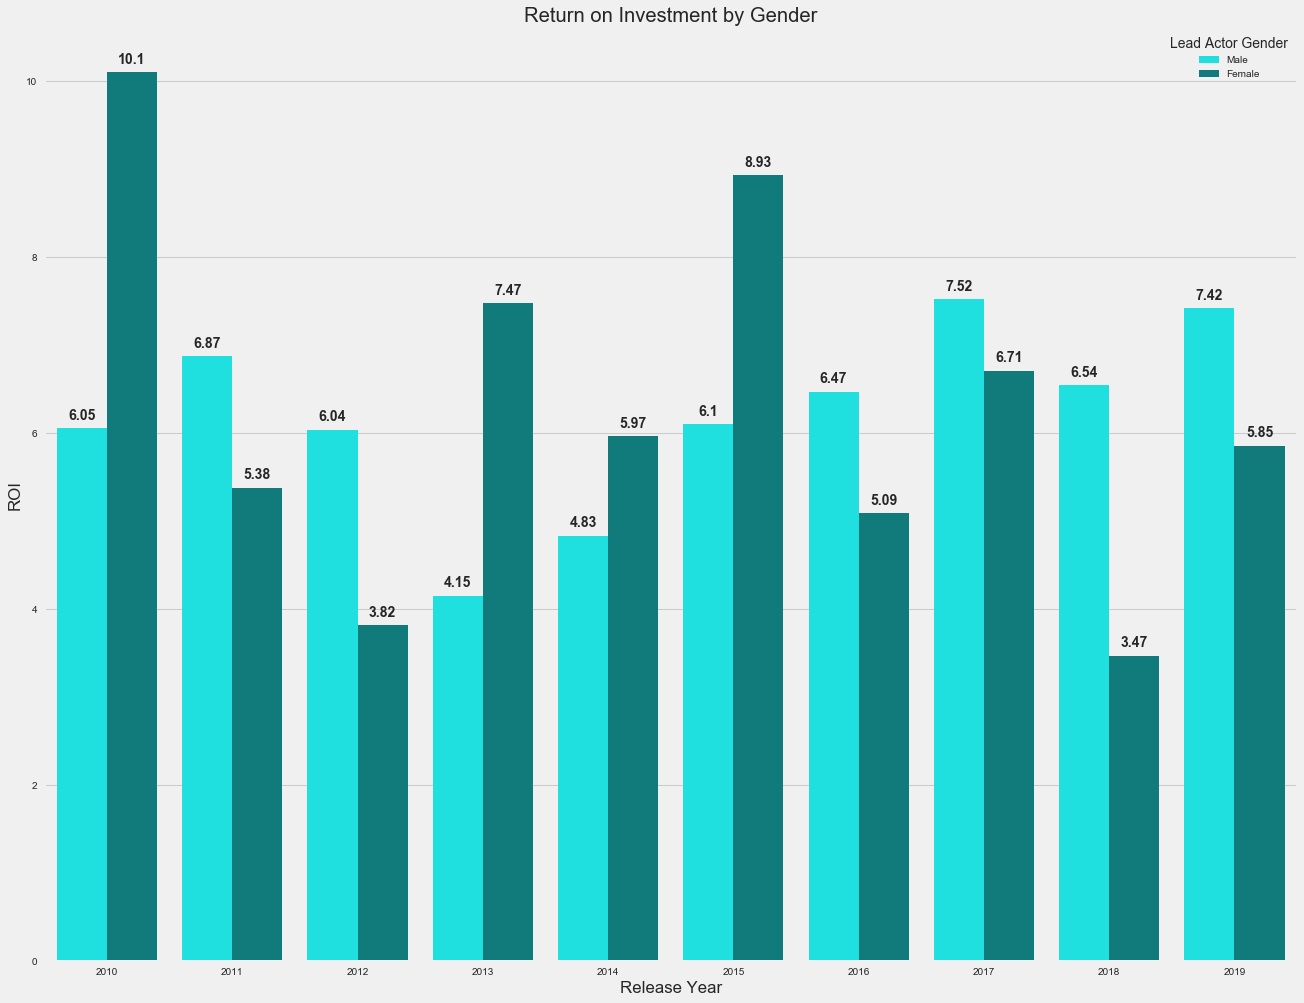

In [23]:
#set style options
sns.set()
plt.style.use('fivethirtyeight')

#plot data
fig, axs = plt.subplots(1, 1, figsize=(20, 16))
bars = sns.barplot(x='release_year', y='roi', data=top_films_global_trans, hue='lead_gender', palette=('cyan', 'darkcyan'), ci=None)
plt.xlabel('Release Year')
plt.ylabel('ROI')
plt.title('Return on Investment by Gender')
plt.legend(title = 'Lead Actor Gender', loc='upper right')

# access the bar attributes to place text in the appropriate location above each bar
for p in bars.patches:
    yval = p.get_height()
    plt.text(p.get_x()+p.get_width()/2, yval + .1, round(yval,2), ha='center', fontweight='bold')

plt.show()

In [24]:
#add a column with budget classifications starting at 1 dollar to exclude films with no budget information: budget_category
bins = [1, 9.999e6, 29.999e6, 49.999e6, 99.999e6, float('Inf')]
labels = ['Under 10M', '10M to 30M', '30M to 50M', '50M to 100M', '100M+']
top_films_global_trans['budget_category'] = pd.cut(top_films_global_trans['budget'],
                                                   bins = bins, labels = labels)

In [25]:
top_films_global_trans.head(10)

,title,release_year,genre,country,director,actors,budget,usa_gross_income,worldwide_gross_income,lead_actor,lead_gender,bechdel_status,roi,budget_category
46673,Toy Story 3 - The Great Escape,2010,"Animation, Adventure, Comedy",USA,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",200000000,415004880,1066969703,Tom Hanks,Male,Yes,5.334849,100M+
52435,Alice in Wonderland,2010,"Adventure, Family, Fantasy","USA, UK",Tim Burton,"Johnny Depp, Mia Wasikowska, Helena Bonham Car...",200000000,334191110,1025467110,Johnny Depp,Male,Yes,5.127336,100M+
51529,Harry Potter and the Deathly Hallows - Part 1,2010,"Adventure, Family, Fantasy","UK, USA",David Yates,"Bill Nighy, Emma Watson, Richard Griffiths, Ha...",150000000,296347721,976952911,Bill Nighy,Male,Yes,6.513019,100M+
57475,Inception,2010,"Action, Adventure, Sci-Fi","USA, UK",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",160000000,292576195,869784991,Leonardo DiCaprio,Male,Yes,5.436156,100M+
51248,Shrek and they lived happily ever after,2010,"Animation, Adventure, Comedy",USA,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",165000000,238736787,752600867,Mike Myers,Male,No,4.561217,100M+
56976,The Twilight Saga: Eclipse,2010,"Adventure, Drama, Fantasy",USA,David Slade,"Xavier Samuel, Kristen Stewart, Robert Pattins...",68000000,300531751,698491347,Xavier Samuel,Male,Yes,10.271932,50M to 100M
55683,Iron Man 2,2010,"Action, Adventure, Sci-Fi",USA,Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadl...",200000000,312433331,623933331,Robert Downey Jr.,Male,Yes,3.119667,100M+
45080,Rapunzel: The Intertwining of the Tower,2010,"Animation, Adventure, Comedy",USA,"Nathan Greno, Byron Howard","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",260000000,200821936,592461732,Mandy Moore,Female,Yes,2.278699,100M+
56958,Despicable Me,2010,"Animation, Comedy, Family","USA, France","Pierre Coffin, Chris Renaud","Steve Carell, Jason Segel, Russell Brand, Juli...",69000000,251513985,543113985,Steve Carell,Male,Yes,7.871217,50M to 100M
51246,How to Train Your Dragon,2010,"Animation, Action, Adventure",USA,"Dean DeBlois, Chris Sanders","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",165000000,217581231,494878759,Jay Baruchel,Male,Yes,2.999265,100M+


In [26]:
top_films_global_trans.loc[58026,'bechdel_status'] = 'No'
#top_films_global_trans.groupby('lead_gender')['roi'].mean()

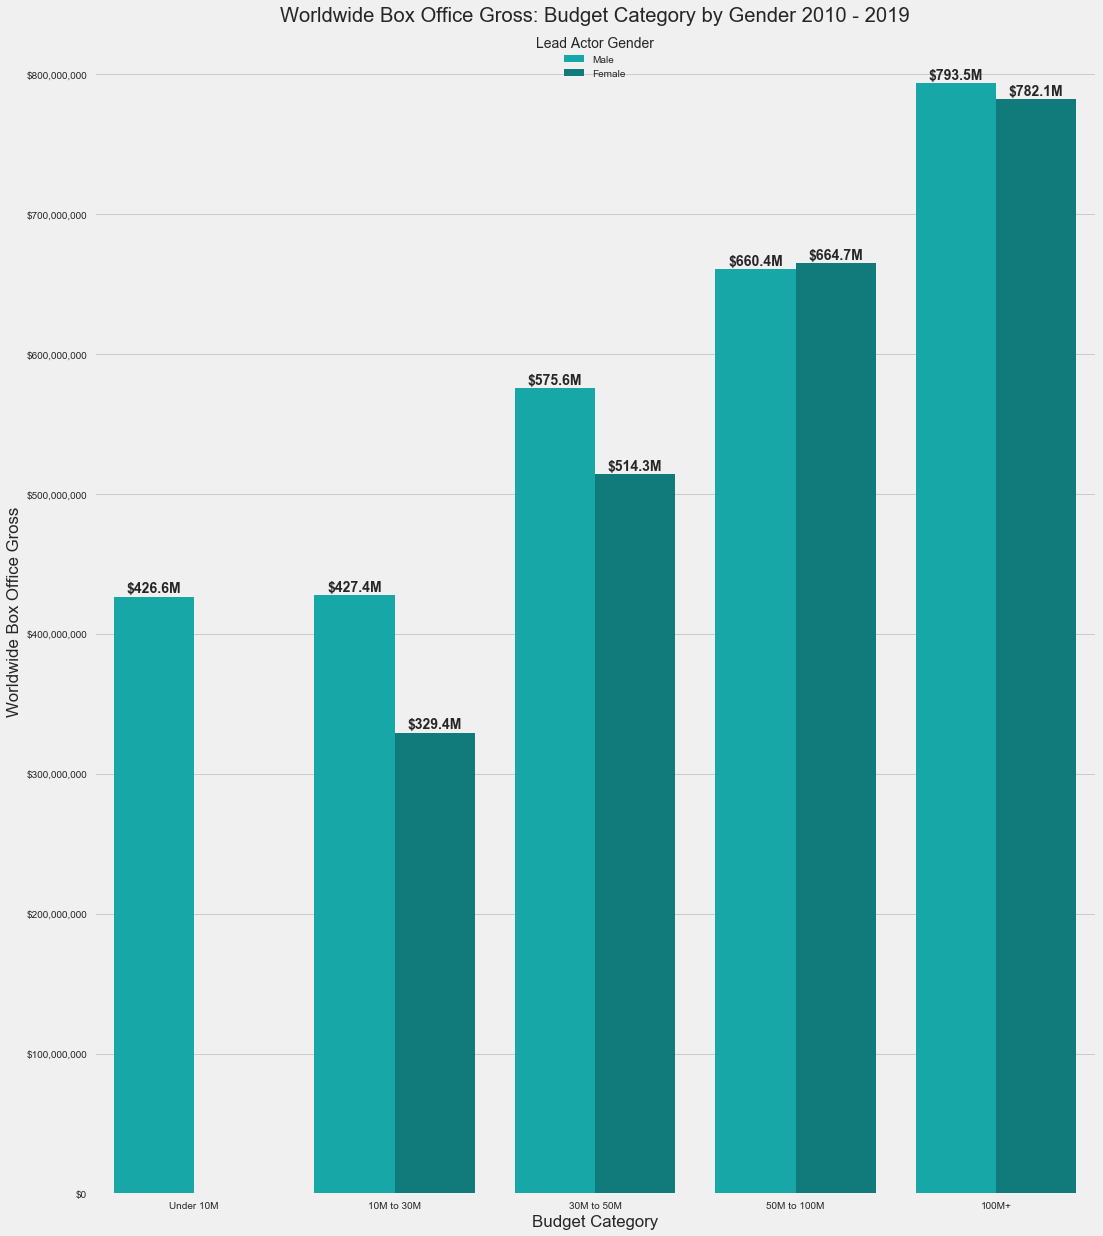

In [27]:
#import libraries to format dollar values and allow exclusion of bar heights that do not exist
import matplotlib.ticker as mtick
import math

sns.set()
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1, 1, figsize=(16, 20))
bars = sns.barplot(x='budget_category', y='worldwide_gross_income', data=top_films_global_trans, hue='lead_gender',
            palette=('c','darkcyan'), ci=None)

plt.xlabel('Budget Category')
plt.ylabel('Worldwide Box Office Gross')
plt.legend(title = 'Lead Actor Gender', loc='upper center')
plt.title('Worldwide Box Office Gross: Budget Category by Gender 2010 - 2019')

# access the bar attributes to place text in the appropriate location above each bar
for p in bars.patches:
    y_val = p.get_height()
    if not math.isnan(y_val):
        plt.text(p.get_x()+p.get_width()/2, y_val + 3e6, "${:.4}{}".format(y_val/1e6,"M"), ha='center', fontweight='bold')

#format y_axis to display in dollars with better tick segmentation
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.show()

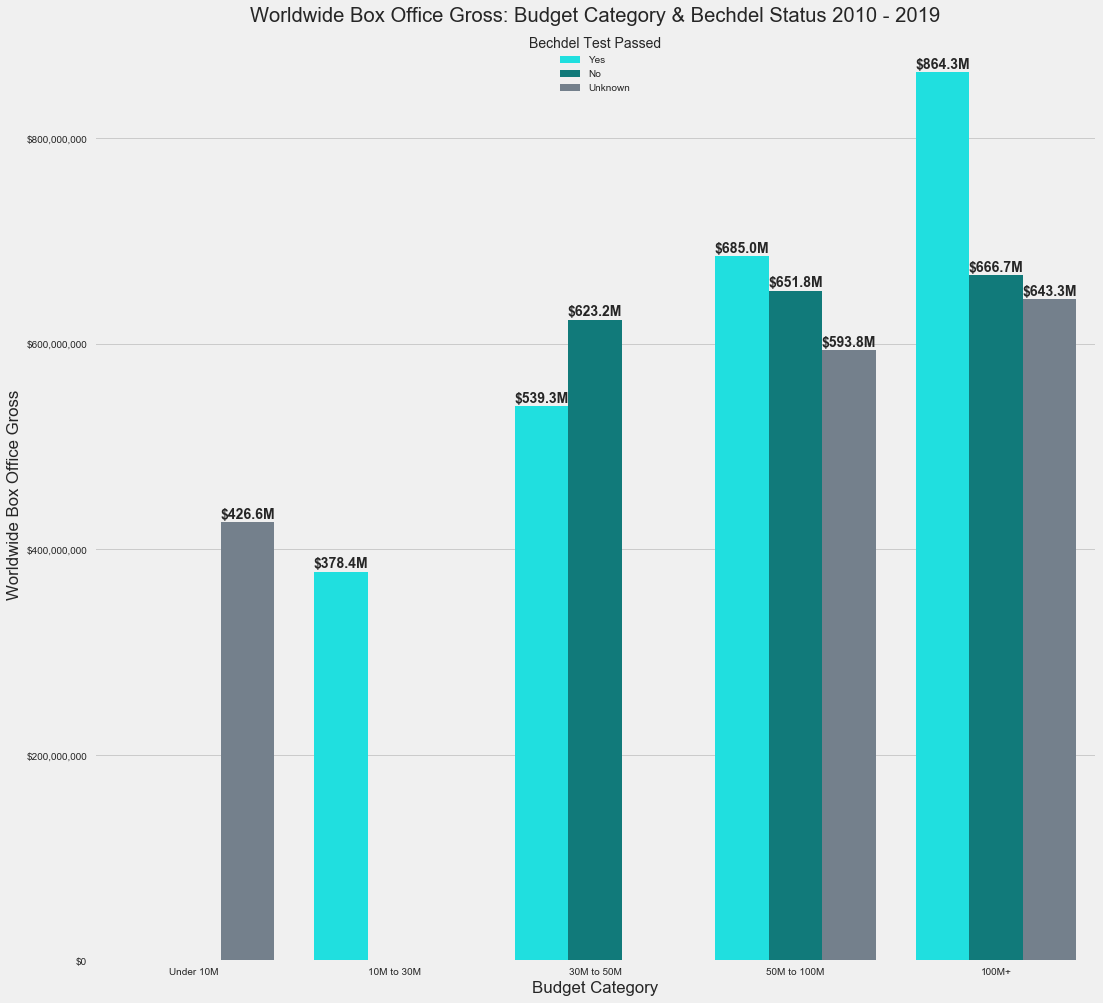

In [28]:
sns.set()
plt.style.use('fivethirtyeight')

#alpha_l = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
#alpha_l = norm
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
bars = sns.barplot(x='budget_category', y='worldwide_gross_income', data=top_films_global_trans, hue='bechdel_status',
            palette=('cyan','darkcyan','slategray'), ci=None)
plt.xlabel('Budget Category')
plt.ylabel('Worldwide Box Office Gross')
plt.title('Worldwide Box Office Gross: Budget Category & Bechdel Status 2010 - 2019')
plt.legend(title = 'Bechdel Test Passed', loc='upper center')

#display box office gross above each bar
for p in bars.patches:
    y_val = p.get_height()
    if not math.isnan(y_val):
        plt.text(p.get_x() + p.get_width()/2, y_val + 4e6, "${:.4}{}".format(y_val/1e6,"M"), ha='center', fontweight='bold')

#format y_axis to display in dollars with better tick segmentation
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

#for bar, alpha in zip(ax.containers[0], alpha_l):
#    bar.set_alpha(alpha)
plt.show()